## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from smote import smote_sampling
from train_and_pred import train_and_predict
from model_evaluation import calculate_metrics, stratified_cv, roc_plot
from fraud_distribution import fraud_distr 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score 


/Users/kyledennis/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Import and Cleaning

In [2]:
# read in data
data = pd.read_csv('dataset.csv')

# check for nulls
# print(data.isnull().values.any())
# No nulls

# obtain X and y
X = data[["Time", "Amount", "V1", "V2"]]
y = data['Class']

# find fraud distribution
fraud_count, fraud_percentage_rounded = fraud_distr(y)

# print fraud distribution
print('There are ' + str(fraud_count) + ' fraudulent transactions- about ' + str(fraud_percentage_rounded) + ' percent of the dataset.')

There are 492 fraudulent transactions- about 0.1727 percent of the dataset.


## Create Training Sets

In [3]:
# Scale non-pc data before splitting
scaler = StandardScaler()
X_scaled = X.copy() 
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split scaled data into training set(80%) and test set(20%) using stratified splitting
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=7)

# apply SMOTE to scaled training data- have new minority class be about 30 percent of the majority class
X_train_scaled_sampled, y_train_sampled = smote_sampling(X_train_scaled, y_train, sample_proportion=0.3)

# find new fraud proportion
fraud_count_new, fraud_percentage_rounded_new = fraud_distr(y_train_sampled)

# print new fraud distribution
print('There are ' + str(fraud_count_new) + ' fraudulent transactions in the first SMOTE training set- about ' + str(fraud_percentage_rounded_new) + ' percent of the training data.')


# apply SMOTE to scaled training data again- have new minority class be about 70 percent of the majority class
X_train_scaled_sampled2, y_train_sampled2 = smote_sampling(X_train_scaled, y_train, sample_proportion=0.7)

# find new fraud proportion
fraud_count_new2, fraud_percentage_rounded_new2 = fraud_distr(y_train_sampled2)

# print new fraud distribution
print('There are ' + str(fraud_count_new2) + ' fraudulent transactions in the second SMOTE training set- about ' + str(fraud_percentage_rounded_new2) + ' percent of the training data.')

There are 68235 fraudulent transactions in the first SMOTE training set- about 23.0768 percent of the training data.
There are 159215 fraudulent transactions in the second SMOTE training set- about 41.1764 percent of the training data.


## Logistic Regression

#### Original training set

{'accuracy': 0.9984375548611355, 'precision': 0.8461538461538461, 'recall': 0.11224489795918367}
auc of base lr: 0.8595164043388881


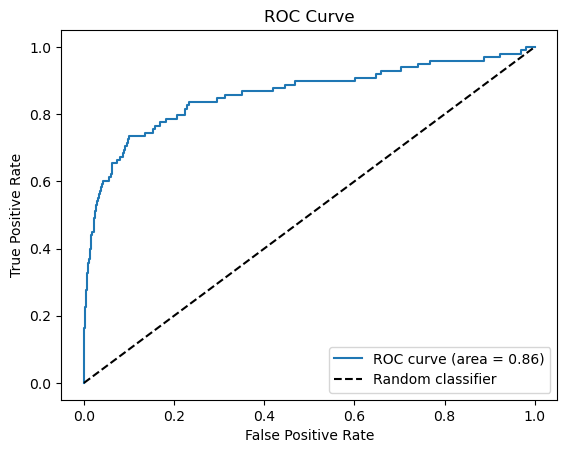

In [4]:
# Initialize base model
lr = LogisticRegression(random_state=22)

# Fit model and get predictions
y_pred_prob_lr, y_pred_lr = train_and_predict(lr, X_train_scaled, y_train, X_test_scaled)

# Get accuracy metrics
lr_metrics = calculate_metrics(y_test, y_pred_lr)
print(lr_metrics)
lr_auc = roc_auc_score(y_test, y_pred_prob_lr)
print('auc of base lr: '+ str(lr_auc))

# Plot auc
roc_plot(y_test, y_pred_prob_lr, lr_auc)

#### First SMOTE training set

{'accuracy': 0.9705066535585127, 'precision': 0.029166666666666667, 'recall': 0.5}
auc of first SMOTE lr: 0.8821502503646365


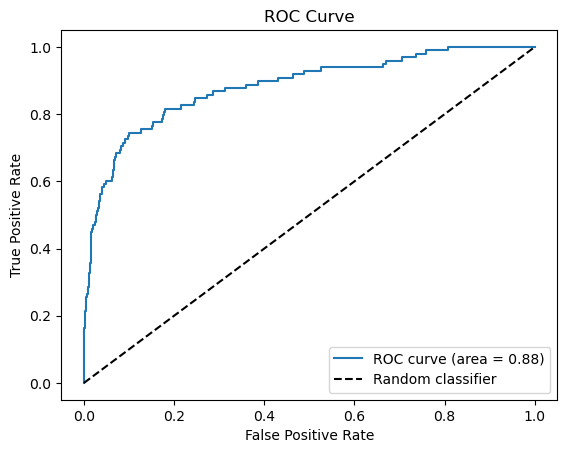

In [5]:
# Fit first SMOTE model and get predictions
y_pred_prob_lr2, y_pred_lr2 = train_and_predict(lr, X_train_scaled_sampled, y_train_sampled, X_test_scaled)

# Get accuracy metrics
lr_metrics2 = calculate_metrics(y_test, y_pred_lr2)
print(lr_metrics2)
lr_auc2 = roc_auc_score(y_test, y_pred_prob_lr2)
print('auc of first SMOTE lr: '+ str(lr_auc2))

# Plot auc
roc_plot(y_test, y_pred_prob_lr2, lr_auc2)

#### Second SMOTE training set

{'accuracy': 0.919560408693515, 'precision': 0.01513840830449827, 'recall': 0.7142857142857143}
auc of first SMOTE lr: 0.8818692361581661


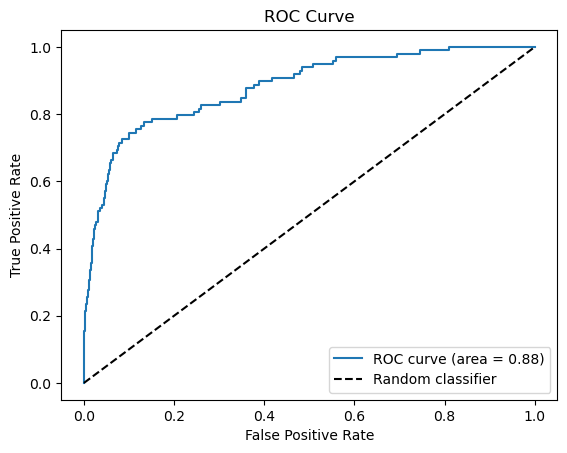

In [34]:
# Fit first SMOTE model and get predictions
y_pred_prob_lr3, y_pred_lr3 = train_and_predict(lr, X_train_scaled_sampled2, y_train_sampled2, X_test_scaled)

# Get accuracy metrics
lr_metrics3 = calculate_metrics(y_test, y_pred_lr3)
print(lr_metrics3)
lr_auc3 = roc_auc_score(y_test, y_pred_prob_lr3)
print('auc of first SMOTE lr: '+ str(lr_auc3))

# Plot auc
roc_plot(y_test, y_pred_prob_lr3, lr_auc3)

## Random Forest

## Gradient Boosting